# Overview

We're now switching focus away from the Network Science (for a little bit), beginning to think about _Language Processing_ instead. In other words, today will be all about learning to parse and make sense of textual data. This ties in nicely with our work on the network of Computational Social Scientists, because papers naturally contain text.

We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Part 1 - Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Part 2 -  Figuring out how to make NLTK to work with real world data.
* Part 3 - Apply some of the concepts that you have learned to study the abstract dataset

> **_Video Lecture_**. [Intro to Natural Language processing](https://www.youtube.com/watch?v=Ph0EHmFT3n4). Today is all about working with NLTK, so not much lecturing - we will start with a perspective on text analysis by Sune (you will hear him talking about Wikipedia data here and there. Everything he sais applies to other textual data as well!)

#  Part 1 : Installing and the basics

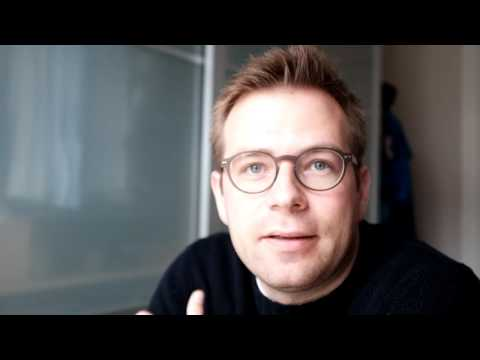

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)


> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1, 2, 3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a `notebook`. 
 

### NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks: In the iPython notebook, run the code 

     import nltk
     nltk.download()

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

> Exercises: NLPP Chapter 1 (the stuff that might be due in an upcoming assignment).
> 
> The following exercises from Chapter 1 are what might be due in an assignment later on.
>
> * Try out the `concordance` method, using another text and a word of your own choosing.
> * Also try out the `similar` and `common_context` methods for a few of your own examples.
> * Create your own version of a dispersion plot ("your own version" means another text and different word).
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
> * Create frequency distributions for `text2`, including the cumulative frequency plot for the 75 most common words.

# Part 2 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about.
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

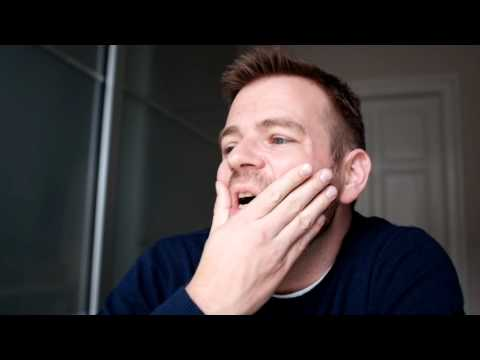

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation on  topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).


# Part 3 - Putting things into practice with the abstract dataset


## Prelude to Exercise 1: Some theory on the Zipf's law. 


**Zipf's Law:** Let $f(w)$ be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. The [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type. 


> _Reading_
> Skim through the Wikipedia page on the [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)

> **Exercise 1: Tokenization and Zipf's law**.
> Consider the list of abstracts of Computational Social Science papers. You shall take the paperIds of Computational Social Science papers (from Week 4), then go back to your *abstract* dataframe (Week 2) to get the abstracts only for those. 
> 
>
> 1. Tokenize the __text__ of each abstract. Create a column __tokens__ in your dataframe containing the tokens. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. **The advice to go back and check Chapter 3 is valid for every cleaning step below**.
>   * Exclude punctuation.
>   * Exclude URLs
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers.
>   * Set everything to lower case.
>   * **Note** that none of the above has to be perfect. And there's some room for improvisation. You can try using stemming. Choices like that are up to you.
> 2. Create a single list that includes the concatenation of all the __tokens__ (from all abstracts).  
> 3. What are the top 50 most common tokens in your corpus?  
> 4. Write a function to process your list of tokens and plot word frequency against word rank using. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
> 5. Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?


## Prelude to Exercise 2: Some theory on bigrams and contingency tables .

In this course, we use a "bag-of-words" approach, beucause using simple methods to explore the data is **very** important before applying any complex model. 
Here, we learn how to account for an issue that often comes up when using a bag-of-words approach when studying textual data. 
The concept of [*collocation*](https://en.wikipedia.org/wiki/Collocation), or *pairs of words that tend to appear together more often than by chance*. It is an important concept in linguistics. 

In the case of collocations, words should be considered together to retain their original meaning (e.g. *machine learning* is not simply *machine* and *learning*. The same applies to *computer science*, *social media*, *computational social science* ).

**How do we find out if a pair of words $w_1, w_2$ appears in a corpus more often than one would expect by chance?** We study the corresponding *contingency table*.
Given a corpus, and two words $w_1$ and $w_2$, a contingency table is a matrix with the following elements:

$$C_{w_1,w_2}= \begin{bmatrix} n_{ii} & n_{oi} \\ n_{io} & n_{oo} \end{bmatrix}$$

$n_{ii}$: the number of times the bigram ($w_1$, $w_2$) appear in the corpus     
$n_{io}$: the number of bigrams ($w_1$, * ), where the first element is $w_1$ and the second element is **not** $w_2$         
$n_{oi}$:  the number of bigrams ( * , $w_2$ ), where the first element is **not** $w_1$ and the second element is $w_2$    
$n_{oo}$: the number of bigrams ( * , * ) where the first element is **not** $w_1$ and the second is **not** $w_2$. 

Then, we can compare the observed number of occurrences of the bigram, $n_{ii}$, with the number of occurrences we would expect simply by random chance.
The value we would expect by chance is equal to the product between three terms:  the total number of bigrams, $N$; the probability that a bigram starts with $w_1$, which is equal to $(n_{ii} + n_{io})/N$; the probability that a bigram ends with $w_2$, which is equal to $(n_{ii} + n_{oi})/N$.  


To check if the number of times our bigram appears, $n_{ii}$, is close to the value we expect by chance, we can run a [Chi Square test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).



**Note:** [*contigency tables*](https://en.wikipedia.org/wiki/Contingency_table) can be used in any statistical problem where one wants to study multivariate frequency distributions (not just in the case of textual data). 

> **Exercise 2: Bigrams and contingency tables**. 
> 1. Find the list of bigrams in each of the abstracts. If you don't remember how to do it, go back to [Chapter 1](http://www.nltk.org/book/) of your book. Store all the bigrams in a single list.  
> 2. For each unique bigram in your list:
>   - compute the corresponding *contingency table* (see the theory just above)
>   - compute the p-value associated to the [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
> 3. What is the sum of all the elements of a contingency table?  
> 4. Find the list of bigrams with p-value smaller than 0.001.
> 5. How many bigrams have you found? Print out 10 of them. What do you observe? Which bigrams does this list include? 
> 6. *(Optional)* Recompute the __tokens__ column in your dataframe. This time, do not split pairs of words that constitute a collocation (they should be part of the same token). **Hint:** You can use the [MWETokenizer](https://www.nltk.org/_modules/nltk/tokenize/mwe.html). 
> 7. Save your filtered abstract dataframe with the new __tokens__ column. **You can also delete your old abstract dataframe, that included all papers.**
